#### V1 实现感知机（单个神经元），但在此v1版本暂时不考虑bias，也就是只有weight

In [96]:
import numpy as np

np.random.seed(0)
2*np.random.random((2, 1)) - 1

array([[0.09762701],
       [0.43037873]])

In [118]:
class Perceptron():
    def __init__(self):
        
        self.x = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
        self.y = np.array([[0, 1, 1, 0]]).T

        # learning rate
        self.rate = 0.01

        # weight
        self.weight = np.array([[0.0, 0.0, 0.0]]).T

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fp(self, x):
        """
        forward propagation
        计算结果
        """
        # 神经元的输出，w * x （权重乘以输入）
        return self.sigmoid(np.dot(x, self.weight))

    def bp(self, output):
        """
        backward propagation
        更新权重
        """
        # 权重增量，rate*(t-y)*x
        delta = np.dot(self.x.T, self.rate*(self.y - output))
        self.weight += delta
    
    def fit(self, epoch=100):
        for i in range(epoch):
            output = self.fp(self.x)
            self.bp(output)
    
    def predict(self, x):
        return self.fp(x)
        

p = Perceptron()
p.fit(10000)    

In [95]:
p.predict([1, 1, 1])

array([0.98759758])

#### V2 实现真正的感知机v2版本、带bias和weight
带上bias后，感知机的表达能力就可以更强，比如可以在原点以外做分类线分类

In [164]:
class Perceptron():
    def __init__(self):
        
        self.x = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [5, 5], [6, 6], [4, 5], [2, 4]])
        self.y = np.array([[0, 0, 0, 0, 1, 1, 1, 1]]).T

        # learning rate
        self.rate = 0.01

        # weight
        self.weight = np.array([[0.0, 0.0]]).T
        
        # bias
        self.bias = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fp(self, x):
        """
        forward propagation
        计算结果
        """
        # 神经元的输出，w * x + b（权重 * 输入 + 偏置）
        # 因为采用矩阵运算、加偏置的时候是np.sum，这里比较绕
        return self.sigmoid(np.dot(x, self.weight) + self.bias)

    def bp(self, output):
        """
        backward propagation
        更新权重和偏置
        """
        # 偏置更新，rate*(t-y)
        delta_bias = self.rate*(self.y - output)
        self.bias += np.sum(delta_bias)
        
        # 权重增量，rate*(t-y)*x
        delta_weight = np.dot(self.x.T, delta_bias)
        self.weight += delta_weight
    
    def fit(self, epoch=100):
        for i in range(epoch):
            output = self.fp(self.x)
            self.bp(output)
    
    def predict(self, x):
        return self.fp(x)
    
    def print_para(self):
        print('weight:', self.weight)
        print('bias', self.bias)
        

p = Perceptron()
p.fit(100000)    

In [165]:
# from numpy import array, exp, random, dot

# X = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
# y = array([[0, 1, 1, 0]]).T
# weights = 2* random.random((3, 1)) - 1

# for it in range(10):
#     output = 1/(1+exp(-dot(X, weight)))
#     print(y, output)
#     error = y - output
#     print(error)
p.predict([0, 0])

array([5.10742984e-09])

In [162]:
p.print_para()

weight: [[10.22484059]
 [10.22484059]]
bias -15.50655052229303


**Perceptron of sklearn**

In [179]:
from sklearn.linear_model import Perceptron
x = np.array([[0, 0], [1, 1.2], [2, 2.3], [2.1, 3], [5, 5], [6, 6.4], [4, 5], [2, 4]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
clf = Perceptron(max_iter=10000)

clf.fit(x, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=10000, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [180]:
clf.predict([[1, 5]])

array([1])

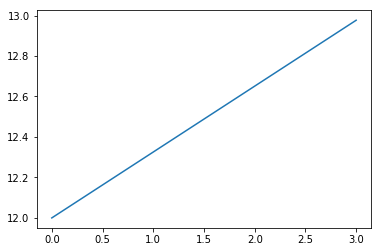

In [181]:
from matplotlib import pyplot as plt
%matplotlib inline  
line_x = np.arange(0,4)
line_y = line_x * (-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_
plt.plot(line_x,line_y)
plt.show()